# Decision Trees and Random Forests

## Data Preprocessing & Exploratory Data Analysis

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv('heart.csv')

# Shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (1025, 14)


In [2]:
df.head() # Display the first few rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.info()  # Display information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
df.isnull().sum()  # Check for missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()  # Get summary statistics of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


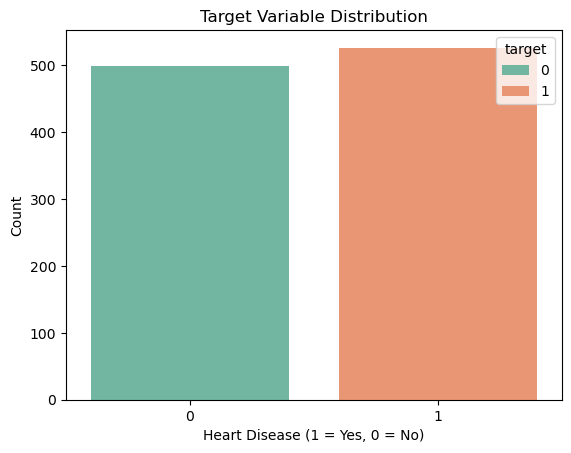

In [70]:
# Count plot for target variable
sns.countplot(data=df, x='target', palette='Set2',hue='target')
plt.title('Target Variable Distribution')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

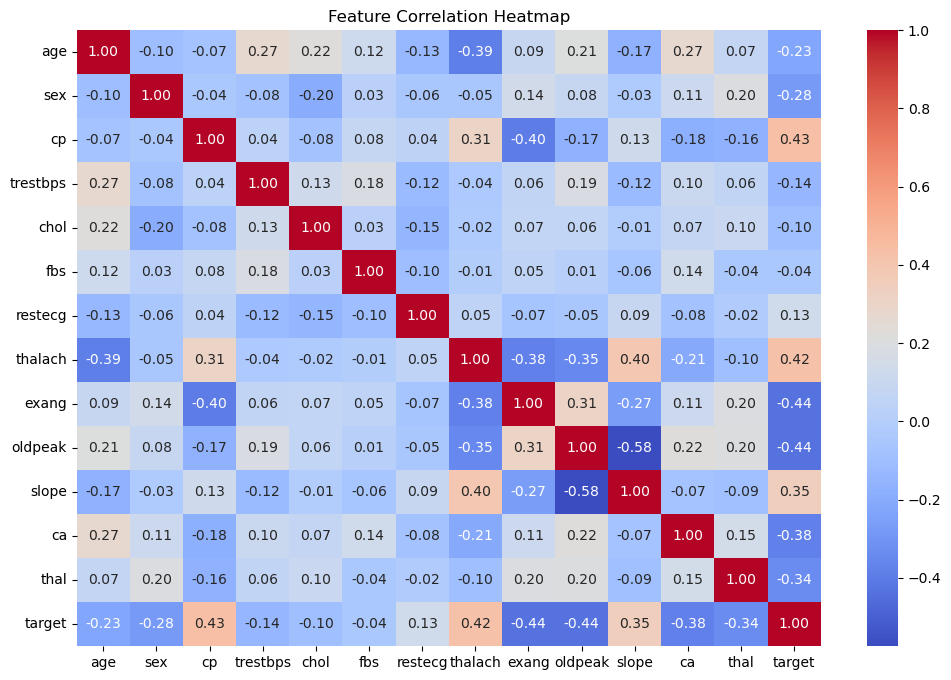

In [71]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Feature Correlation Heatmap')
plt.show()

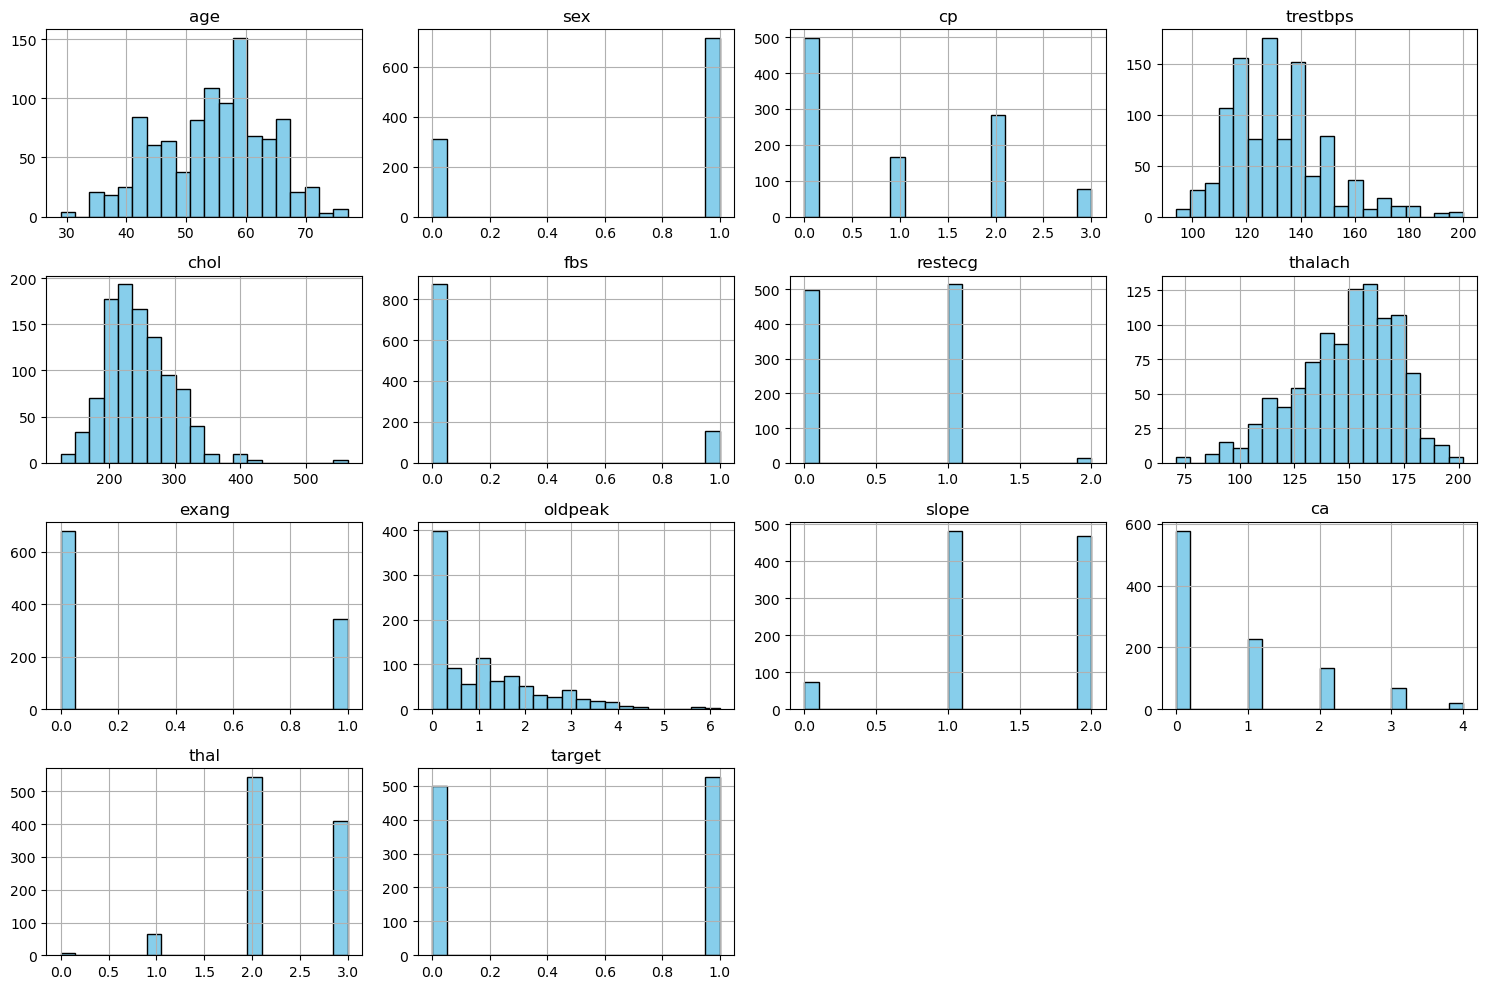

In [72]:
# Histograms of all numerical features
df.hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()

## Train a Decision Tree Classifier and Visualize the Tree

In [11]:
# Separate features and target
X = df.drop('target', axis=1) # Features
y = df['target'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [12]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

Accuracy 0.9853658536585366
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       100
           1       1.00      0.97      0.99       105

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



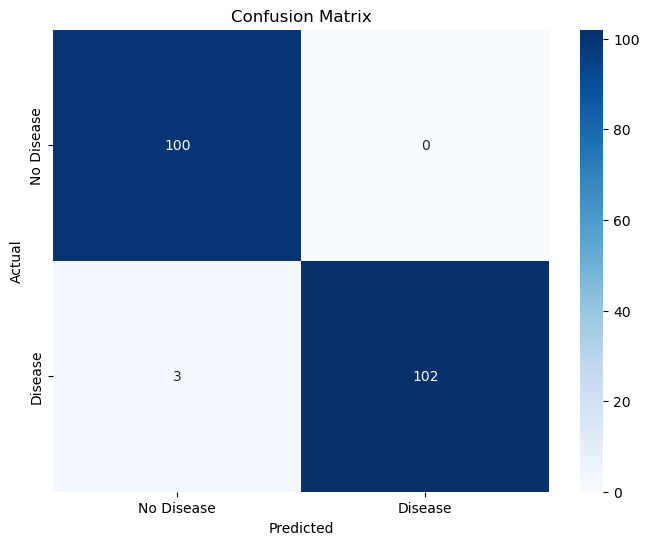

In [15]:
# Predict on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
print("Accuracy", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')   
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

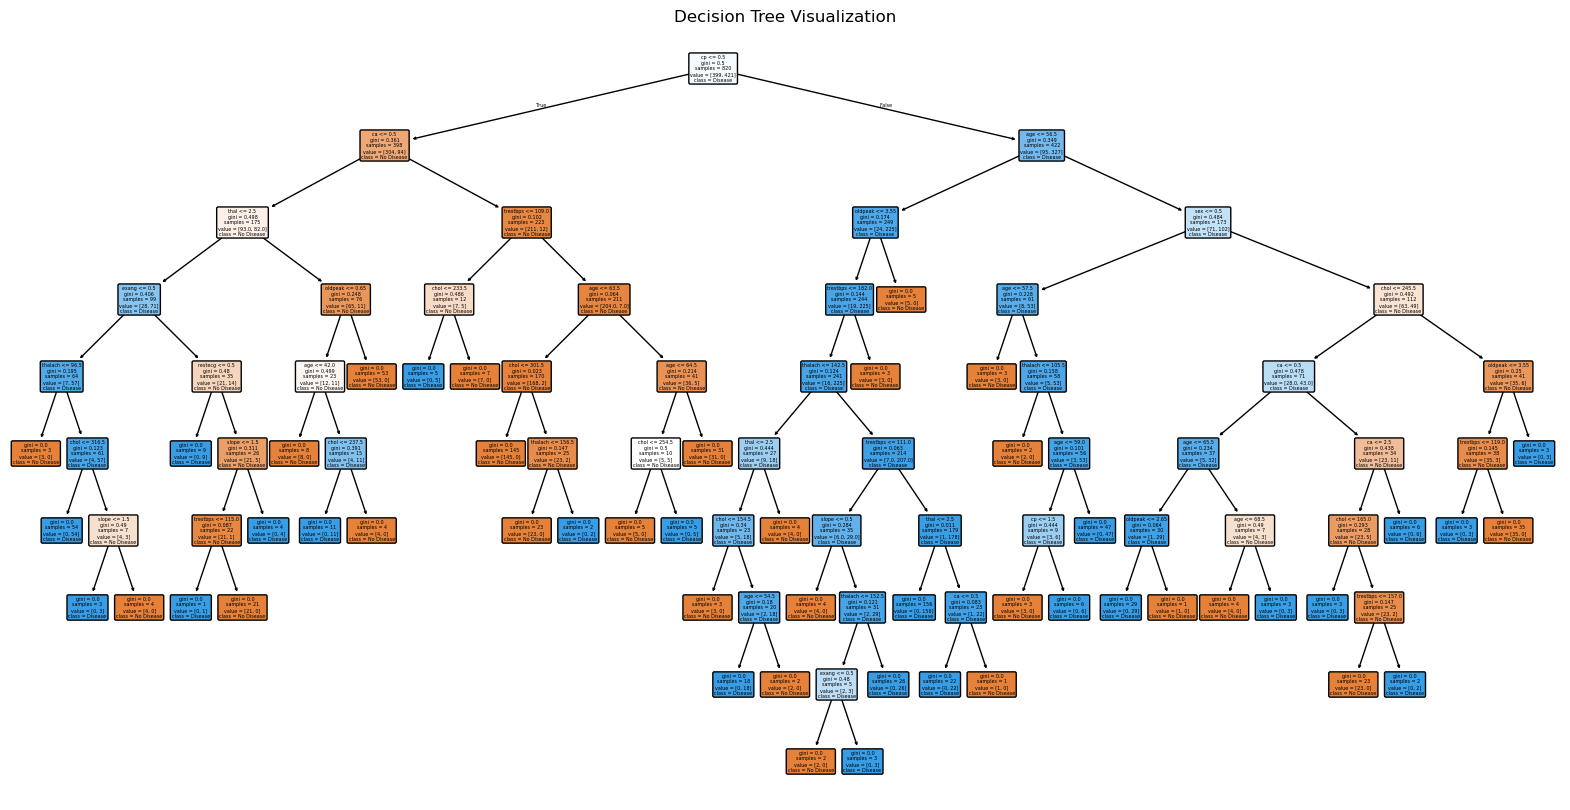

In [44]:
# Visualize the tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()



## Analyze Overfitting and Control Tree Depth

In [ ]:
# Plotting accuracies for different tree depths
train_accuracies = []
test_accuracies = []
depths = range(1, 10)

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(model.score(X_train, y_train))
    test_accuracies.append(model.score(X_test, y_test))


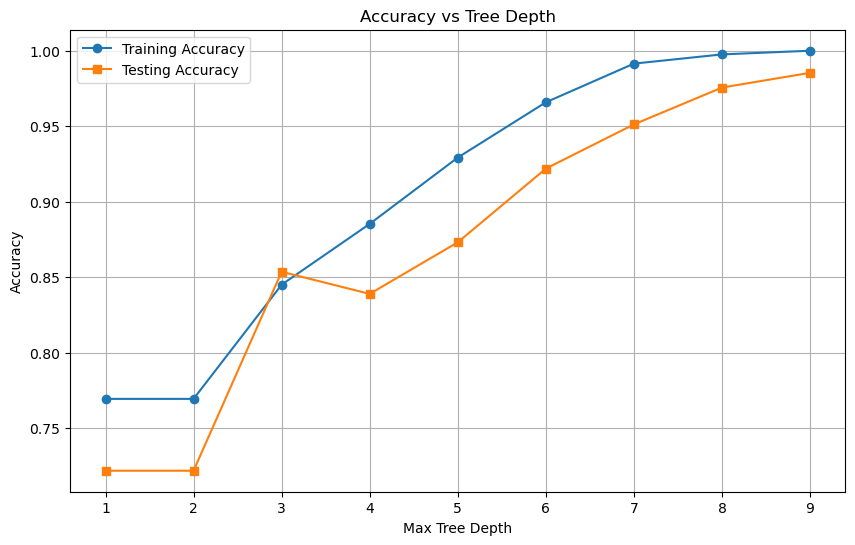

In [45]:
# Visualize the Learning curve
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='s')
plt.xlabel('Max Tree Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Tree Depth')
plt.legend()
plt.grid(True)
plt.show()


Pruned Tree Accuracy: 0.8536585365853658
Pruned Tree Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.85       100
           1       0.84      0.89      0.86       105

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



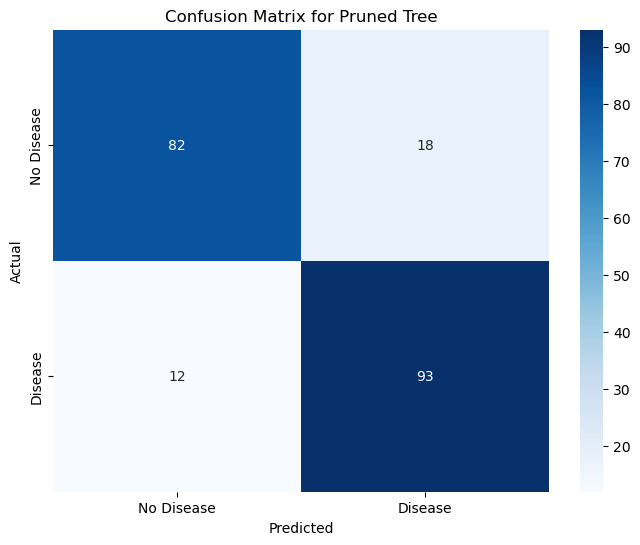

In [74]:
# Pruning the tree to avoid overfitting
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

# Predictions
y_pred_pruned = dt_pruned.predict(X_test)

# Accuracy
print("Pruned Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))
# Classification Report
print("Pruned Tree Classification Report:\n", classification_report(y_test, y_pred_pruned))
# Plotting the pruned tree
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_pruned), annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix for Pruned Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

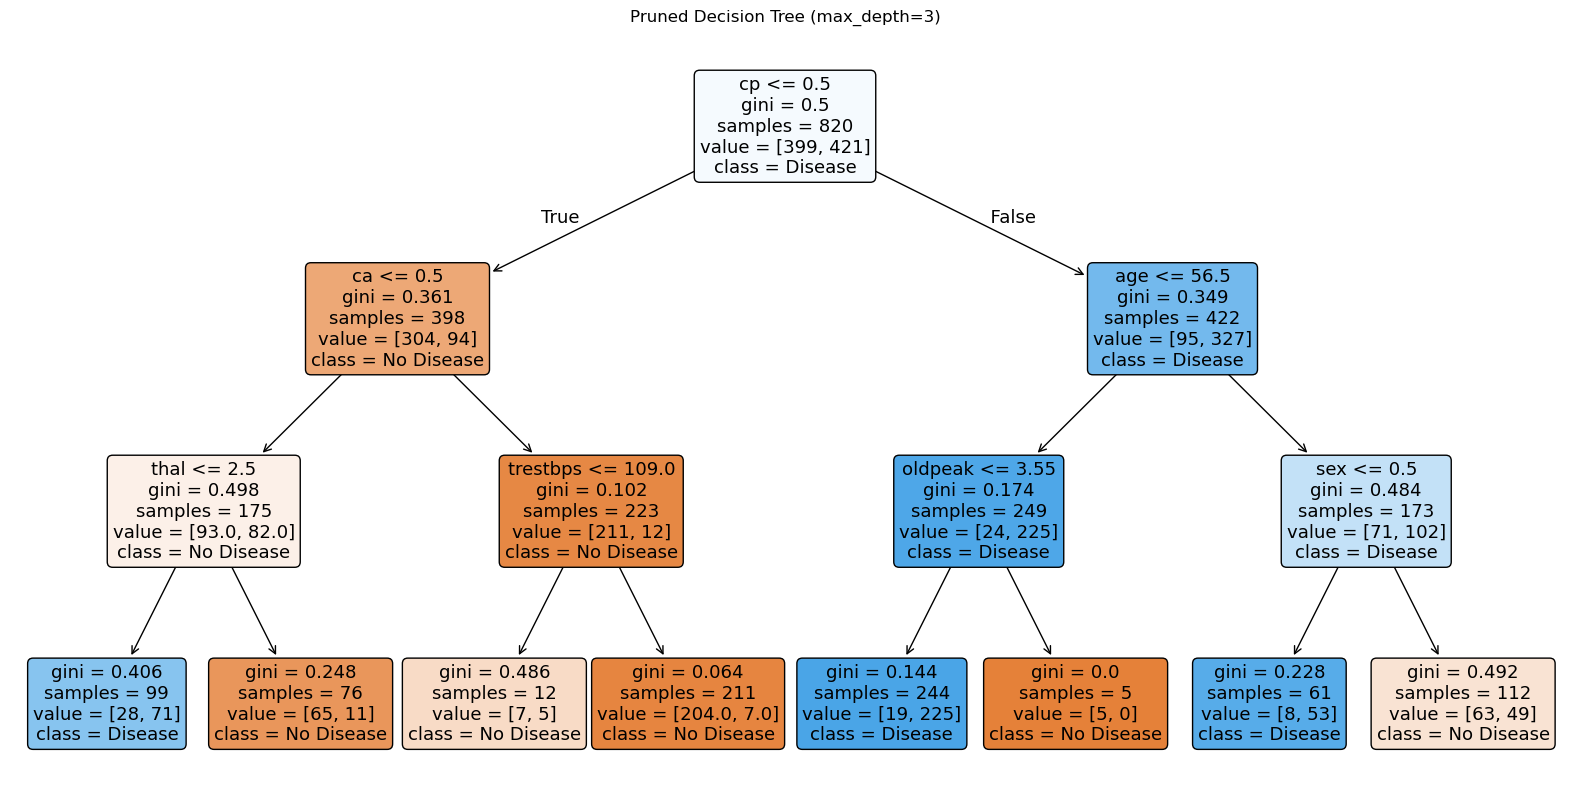

In [73]:
# Plotting the pruned tree
plt.figure(figsize=(20, 10))
plot_tree(dt_pruned, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.title("Pruned Decision Tree (max_depth=3)")
plt.show()


## Train a Random Forest and Compare Accuracy


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100,max_depth= 5, random_state=42)

# Fit to training data
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)


Random Forest Accuracy: 0.926829268292683

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92       100
           1       0.89      0.97      0.93       105

    accuracy                           0.93       205
   macro avg       0.93      0.93      0.93       205
weighted avg       0.93      0.93      0.93       205



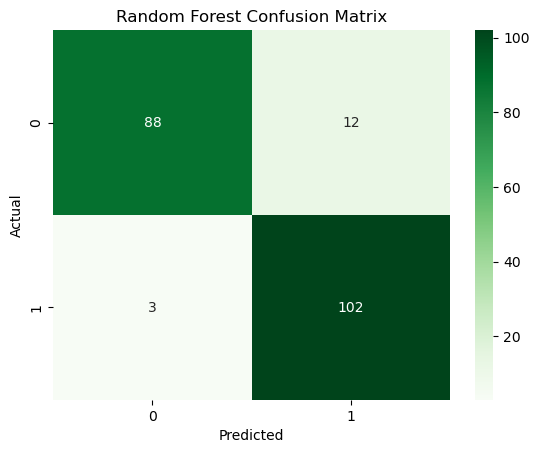

In [59]:
# Accuracy
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [62]:
# Compare with Decision Tree
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_pruned))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Decision Tree Accuracy: 0.8536585365853658
Random Forest Accuracy: 0.926829268292683


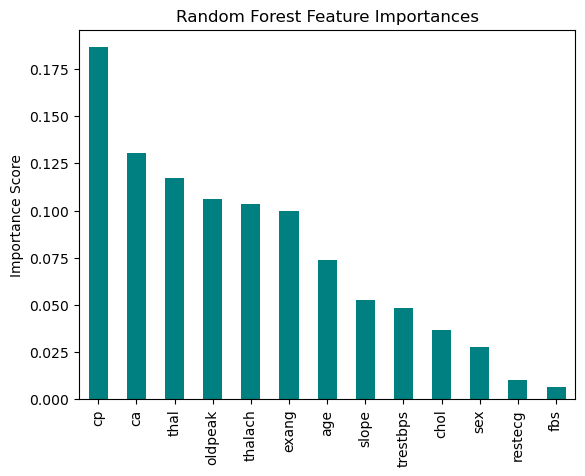

In [63]:
# Feature Importances 
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance Score")
plt.show()


In [ ]:
rf_final = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_final, X, y, cv=5)

# Display results
print("Cross-Validated Accuracy Scores:", cv_scores)
print("Mean Accuracy: {:.3f}".format(cv_scores.mean()))
print("Standard Deviation: {:.3f}".format(cv_scores.std()))


Cross-Validated Accuracy Scores: [0.97073171 0.91219512 0.95121951 0.91219512 0.90243902]
Mean Accuracy: 0.930
Standard Deviation: 0.026


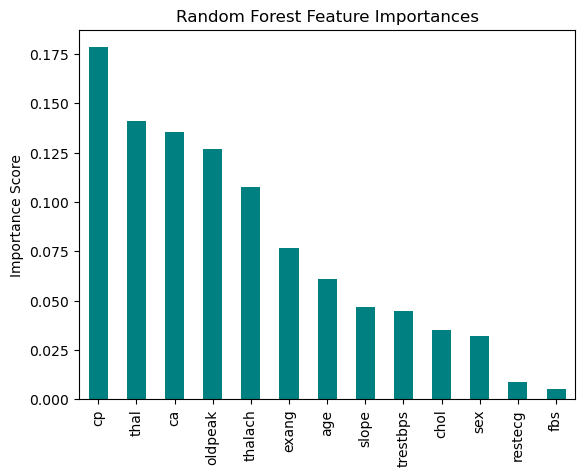

In [ ]:
# Fit the model on full data
rf_final.fit(X, y)

# Get and plot feature importances
importances = pd.Series(rf_final.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Random Forest Feature Importances")
plt.ylabel("Importance Score")
plt.show()